<a href="https://colab.research.google.com/github/BuretGriffin/COREWEEK4-MORINGA/blob/main/BURET_GRIFFIN_WEEK4_CORE_MORINGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
# importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm

In [65]:
# importing dataset
url = 'http://bit.ly/DSCoreAutolibDataset'
car = pd.read_csv(url)
car.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


 **DATA PREVIEW**

In [66]:
# checking columns
car.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [67]:
# checking shape
car.shape


(16085, 13)

In [68]:
# checking datatype
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


**DATA CLEANING**

NULL VALUES

In [69]:
# checking null values
car.isnull().sum()
# there are no null values

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

Consistency

In [70]:
#Checking for duplicates
car.duplicated().sum()

0

validity

In [71]:
# drop  unnecessary coloumns
car.drop(columns=['n_daily_data_points'] , inplace= True, axis = 1)
# outliers
Q1 = car.quantile(0.25)
Q3 = car.quantile(0.75)
IQR = Q3 - Q1
outlier = (car < (Q1 - 1.5 * IQR)) |(car > (Q3 + 1.5 * IQR))
outlier.sum()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  import sys


BlueCars_returned_sum     2213
BlueCars_taken_sum        2215
Postal code               3899
Slots_freed_sum           3235
Slots_taken_sum           3234
Utilib_14_returned_sum    1820
Utilib_14_taken_sum       1815
Utilib_returned_sum       1770
Utilib_taken_sum          1783
date                         0
dayOfWeek                    0
day_type                     0
dtype: int64

ACCURACY

In [72]:
new = car[(car['dayOfWeek'] < 0) & (car['dayOfWeek'] > 6) ].index
car.drop(new , inplace=True)

UNIFORMITY

In [73]:
#Changing date column from object to datetime
car['date'] = pd.to_datetime(car['date'])

In [74]:
#Creating a new column week_day with day of week in words
daydict = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}
car['week_day']  = car['dayOfWeek'].map(daydict)
car.head(2)

,Postal code,date,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum,week_day
0,75001,2018-01-01,0,weekday,110,103,3,2,10,9,22,20,Mon
1,75001,2018-01-02,1,weekday,98,94,1,1,8,8,23,22,Tue


**EXPLORATORY ANALYSIS**

Univariate Analysis

In [75]:
#frequency table of day type
da1 = car.day_type.value_counts()
print("The frequency of day type is: \n", da1)
print('\n')
#Frequency table of week day
da2 = car.week_day.value_counts()
print("The frequency of week_day is: \n", da2)
print('\n')

The frequency of day type is: 
 weekday    11544
weekend     4541
Name: day_type, dtype: int64


The frequency of week_day is: 
 Mon     2374
Tue     2363
Sun     2274
Fri     2271
Wed     2268
Thur    2268
Sat     2267
Name: week_day, dtype: int64




charts

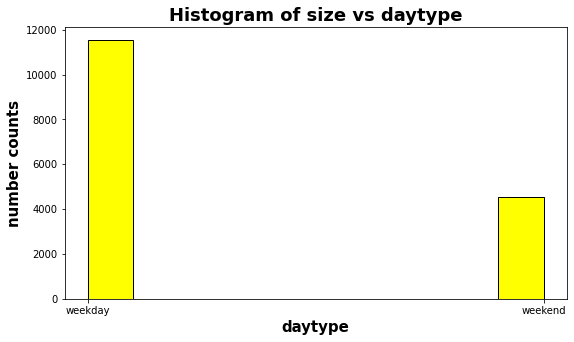

In [76]:
#Histogram of day type
daytype = car['day_type']
plt.figure(figsize=(9,5))
plt.hist(daytype, histtype='bar', color='yellow', edgecolor='black')
plt.xlabel('daytype', fontweight='bold', color='black', fontsize=15)
plt.ylabel('number counts', fontweight='bold', color='black', fontsize=15)
plt.title('Histogram of size vs daytype', fontweight='bold', color='black', fontsize=18)
plt.show()

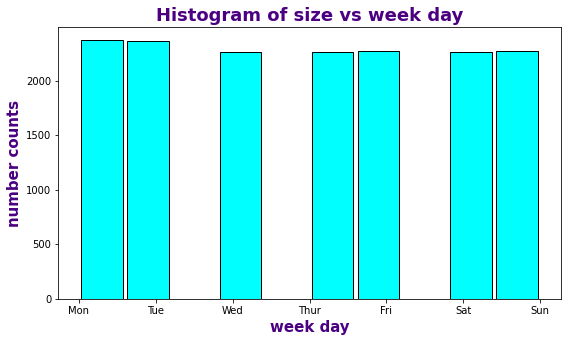

In [77]:
#Histogram of weekday
weekday = car['week_day']
plt.figure(figsize=(9,5))
plt.hist(weekday, bins=10, histtype='bar', rwidth=0.9, color='cyan', edgecolor='black')
plt.xlabel('week day', fontweight='bold', color='indigo', fontsize=15)
plt.ylabel('number counts', fontweight='bold', color='indigo', fontsize=15)
plt.title('Histogram of size vs week day', fontweight='bold', color='indigo', fontsize=18)
plt.show()


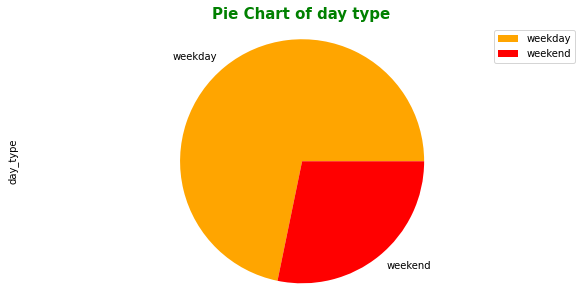

In [78]:
#pie chart for day type
daytype= car['day_type'].value_counts().plot(kind='pie',colors=['orange','red'])
fig=plt.gcf()
fig.set_size_inches(10,5)
#plt.pie(gender,labels= gender,colors=colors,autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.legend(loc='upper right')
plt.title('Pie Chart of day type', fontweight='bold', fontsize=15, color='green')
plt.show()

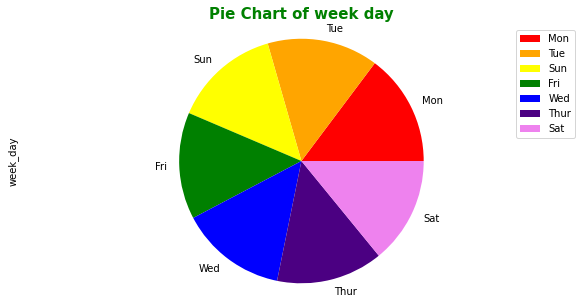

In [79]:
#pie chart for day type
daytype= car['week_day'].value_counts().plot(kind='pie', colors=['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet'])
fig=plt.gcf()
fig.set_size_inches(10,5)
#plt.pie(gender,labels= gender,colors=colors,autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.legend(loc='upper right')
plt.title('Pie Chart of week day', fontweight='bold', fontsize=15, color='green')
plt.show()

In [80]:
car.head()

,Postal code,date,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum,week_day
0,75001,2018-01-01,0,weekday,110,103,3,2,10,9,22,20,Mon
1,75001,2018-01-02,1,weekday,98,94,1,1,8,8,23,22,Tue
2,75001,2018-01-03,2,weekday,138,139,0,0,2,2,27,27,Wed
3,75001,2018-01-04,3,weekday,104,104,2,2,9,8,25,21,Thur
4,75001,2018-01-05,4,weekday,114,117,3,3,6,6,18,20,Fri


NUMERICAL VARIABLES

In [81]:
#mean, median and mode for blue cars taken
d1 = car['BlueCars_taken_sum'].mean()
print("The mean for blue cars taken is: \n", d1)
print('\n')
d2 = car['BlueCars_taken_sum'].median()
print("The median for blue cars taken  is: \n", d2)
print('\n')
d3 = car['BlueCars_taken_sum'].mode()
print("The mode for blue cars taken  is: \n", d3)
print('\n')

The mean for blue cars taken is: 
 125.92695057506994


The median for blue cars taken  is: 
 46.0


The mode for blue cars taken  is: 
 0    12
dtype: int64




In [82]:
#Standard deviation and variance of age of respondents
d1 = car['BlueCars_taken_sum'].std()
print("The standard deviation for bluecars_taken_sum is: \n", d1)
print('\n')
d2 = car['BlueCars_taken_sum'].var()
print("The variance for bluecars_taken_sum is: \n", d2)
print('\n')
#Range for respondent age
max = car['BlueCars_taken_sum'].max()
min = car['BlueCars_taken_sum'].min()
range = max - min
print("The range for bluecars taken sum is: \n", range)

The standard deviation for bluecars_taken_sum is: 
 185.42657876727893


The variance for bluecars_taken_sum is: 
 34383.01611333789


The range for bluecars taken sum is: 
 1352


In [83]:
#Standard deviation and variance of age of respondents
d1 = car['BlueCars_returned_sum'].std()
print("The standard deviation for bluecars_returned_sum is: \n", d1)
print('\n')
d2 = car['BlueCars_returned_sum'].var()
print("The variance for bluecars_returned_sum is: \n", d2)
print('\n')
#Range for respondent age
max = car['BlueCars_returned_sum'].max()
min = car['BlueCars_returned_sum'].min()
range1 = max - min
print("The range for bluecars returned sum is: \n", range1)

The standard deviation for bluecars_returned_sum is: 
 185.50153480148427


The variance for bluecars_returned_sum is: 
 34410.819413706275


The range for bluecars returned sum is: 
 1332


QUANTILES

In [84]:
#The quatiles of blue cars returned
car['BlueCars_returned_sum'].quantile([0.25,0.5,0.75])

0.25     20.0
0.50     46.0
0.75    135.0
Name: BlueCars_returned_sum, dtype: float64

In [85]:
#The quatiles of blue cars taken
car['BlueCars_taken_sum'].quantile([0.25,0.5,0.75])

0.25     20.0
0.50     46.0
0.75    135.0
Name: BlueCars_taken_sum, dtype: float64

Skewness

In [86]:
#Skeweness of blue cars taken
taken = car['BlueCars_taken_sum'].skew()
print(taken)
if taken > 0:
  print('The distribution is positively skewed')
elif taken < 0:
    print('The distribution is negatively skewed')
else:
    print(' The distribution is Symmetric')

2.4063548974959086
The distribution is positively skewed


In [87]:
#The skewness of bluecars returned
returned = car['BlueCars_returned_sum'].skew()
print(returned)
if returned > 0:
  print('The distribution is positively skewed')
elif returned < 0:
    print('The distribution is negatively skewed')
else:
    print(' The distribution is Symmetric')

2.412084978838923
The distribution is positively skewed


Kurtosis

In [88]:
#Kurtosis for bluecars taken
taken1 = car['BlueCars_taken_sum'].kurt()
print(taken1)
if taken1 > 0:
  print('Leptokurtic')
elif taken1 < 0:
    print('Platykurtic')
else:
    print('Mesokurtic')

6.172692305510042
Leptokurtic


In [89]:
#Kurtosis for bluecars returned
returned1 = car['BlueCars_returned_sum'].kurt()
print(returned1)
if returned1 > 0:
  print('Leptokurtic')
elif returned1 < 0:
    print('Platykurtic')
else:
    print('Mesokurtic')

6.1862880957582345
Leptokurtic


In [90]:
#summary statistics
a = car['BlueCars_taken_sum'].describe()
print("The summary statistics for sum of blue cars taken is: \n", a)
print('\n')
b = car['BlueCars_returned_sum'].describe()
print("The summary statistics for sum of blue cars returned is: \n", b)
print('\n')

The summary statistics for sum of blue cars taken is: 
 count    16085.000000
mean       125.926951
std        185.426579
min          0.000000
25%         20.000000
50%         46.000000
75%        135.000000
max       1352.000000
Name: BlueCars_taken_sum, dtype: float64


The summary statistics for sum of blue cars returned is: 
 count    16085.000000
mean       125.912714
std        185.501535
min          0.000000
25%         20.000000
50%         46.000000
75%        135.000000
max       1332.000000
Name: BlueCars_returned_sum, dtype: float64




**VISUALIZATIONS**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


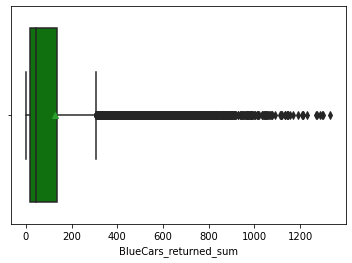

In [91]:
#Box plot for sum of blue cars returned
## boxplot
sns.boxplot(car['BlueCars_returned_sum'], color='green',showmeans=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


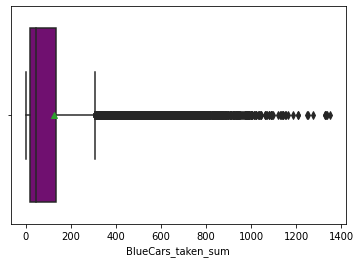

In [92]:
sns.boxplot(car['BlueCars_taken_sum'],color='purple', showmeans=True)

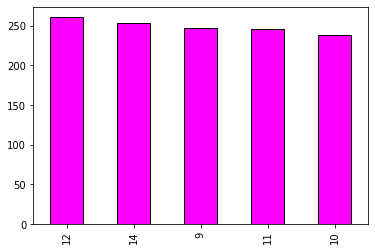

In [93]:
#Bar chart for sum of blue cars taken
car['BlueCars_taken_sum'].value_counts().head().plot.bar(color='magenta', edgecolor='black')

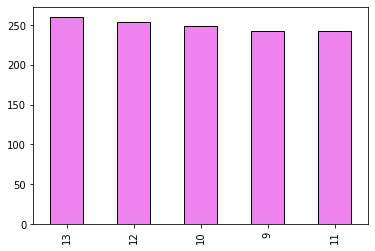

In [94]:
#Bar chart for sum of blue cars returned
car['BlueCars_returned_sum'].value_counts().head().plot.bar(color='violet', edgecolor='black')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of blue cars taken')

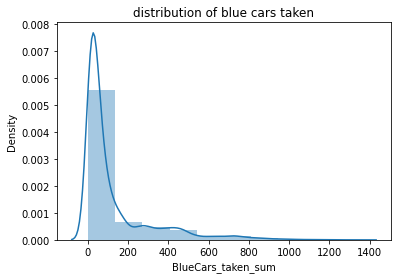

In [95]:
# Plot bluecars taken
sns.distplot(car['BlueCars_taken_sum'], bins=10)
plt.title('distribution of blue cars taken')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of blue cars returned')

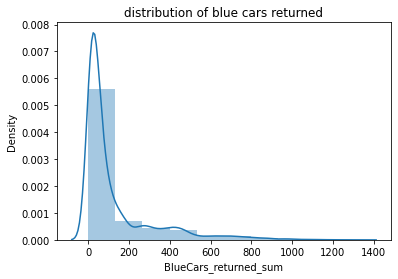

In [96]:
# Plot bluecars returned 
sns.distplot(car['BlueCars_returned_sum'], bins=10)
plt.title('distribution of blue cars returned')

**BIVARIATE VARIABLES**

Numerical and Numerical

In [97]:
car.head(1)

,Postal code,date,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum,week_day
0,75001,2018-01-01,0,weekday,110,103,3,2,10,9,22,20,Mon


In [98]:
#Grouping our sum of bluecars taken according to the day of week
scatter=car.groupby('dayOfWeek')['BlueCars_taken_sum'].sum().reset_index(name='total')
scatter

,dayOfWeek,total
0,0,263893
1,1,261940
2,2,261849
3,3,263207
4,4,288546
5,5,353934
6,6,332166


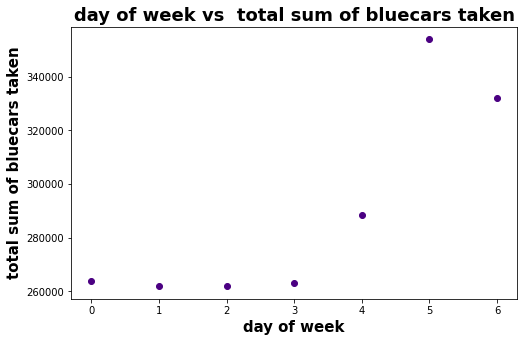

In [99]:
# Plotting our scatterplot
plt.figure(figsize=(8,5))
plt.scatter(scatter["dayOfWeek"] , scatter["total"], color='indigo')
# Giving our scatterplot a title
plt.title('day of week vs  total sum of bluecars taken', fontweight='bold', fontsize=18)

# Labelling our x axis
plt.xlabel('day of week', fontweight='bold', fontsize=15)

# Labelling our y axis
plt.ylabel('total sum of bluecars taken', fontweight='bold', fontsize=15)

# Displaying our scatterplot
plt.show()

In [100]:
#Grouping our sum of bluecars taken according to the day of week
scatter1=car.groupby('dayOfWeek')['BlueCars_returned_sum'].sum().reset_index(name='total')
scatter1

,dayOfWeek,total
0,0,264808
1,1,260470
2,2,260673
3,3,262961
4,4,286029
5,5,351570
6,6,338795


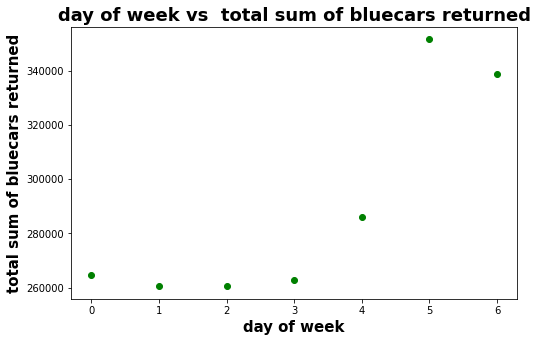

In [101]:
# Plotting our scatterplot
plt.figure(figsize=(8,5))
plt.scatter(scatter1["dayOfWeek"] , scatter1["total"], color='green')
# Giving our scatterplot a title
plt.title('day of week vs  total sum of bluecars returned', fontweight='bold', fontsize=18)

# Labelling our x axis
plt.xlabel('day of week', fontweight='bold', fontsize=15)

# Labelling our y axis
plt.ylabel('total sum of bluecars returned', fontweight='bold', fontsize=15)

# Displaying our scatterplot
plt.show()

In [102]:
#Grouping our sum of bluecars taken according to the day of week
scatter2=car.groupby('dayOfWeek')['n_daily_data_points'].sum().reset_index(name='total')
scatter2

KeyError: ignored

In [ ]:
# Plotting our scatterplot
plt.figure(figsize=(10,5))
plt.scatter(scatter2["dayOfWeek"] , scatter2["total"], color='red')
# Giving our scatterplot a title
plt.title('day of week vs  total sum of n_daily_data_points', fontweight='bold', fontsize=18)

# Labelling our x axis
plt.xlabel('day of week', fontweight='bold', fontsize=15)

# Labelling our y axis
plt.ylabel('total sum of n_daily_data_points', fontweight='bold', fontsize=15)

# Displaying our scatterplot
plt.show()

In [ ]:
#Grouping our sum of bluecars taken according to the postal code
scatter3=car.groupby('postal_code')['BlueCars_taken_sum'].sum().reset_index(name='total')
scatter3
# Plotting our scatterplot
plt.figure(figsize=(10,5))
plt.scatter(scatter3["postal_code"] , scatter3["total"], color='red')
# Giving our scatterplot a title
plt.title('postal code vs  total sum of bluecars taken', fontweight='bold', fontsize=18)

# Labelling our x axis
plt.xlabel('postal_code', fontweight='bold', fontsize=15)

# Labelling our y axis
plt.ylabel('total sum of bluecars taken', fontweight='bold', fontsize=15)

# Displaying our scatterplot
plt.show()

In [ ]:
#Grouping our sum of bluecars taken according to the postal code
scatter4=car.groupby('postal_code')['BlueCars_returned_sum'].sum().reset_index(name='total')
scatter4
# Plotting our scatterplot
plt.figure(figsize=(10,5))
plt.scatter(scatter4["postal_code"] , scatter4["total"], color='brown')
# Giving our scatterplot a title
plt.title('postal code vs  total sum of bluecars returned', fontweight='bold', fontsize=18)

# Labelling our x axis
plt.xlabel('postal_code', fontweight='bold', fontsize=15)

# Labelling our y axis
plt.ylabel('total sum of bluecars returned', fontweight='bold', fontsize=15)

# Displaying our scatterplot
plt.show()

CORRELATION

In [103]:
# Calculating the pearson coefficient
pearson_coeff = car["dayOfWeek"].corr(car["BlueCars_returned_sum"], method="pearson") 
print(pearson_coeff)
# The respondent age and household size have a very weak positive correlation

0.08195445794154745


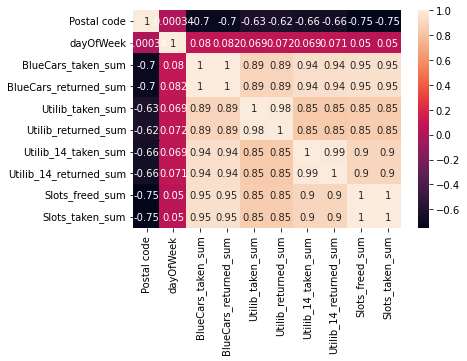

In [104]:
# showing correlation on a heatmap
sns.heatmap(car.corr(),annot=True)
plt.show()

Text(0, 0.5, 'day type')

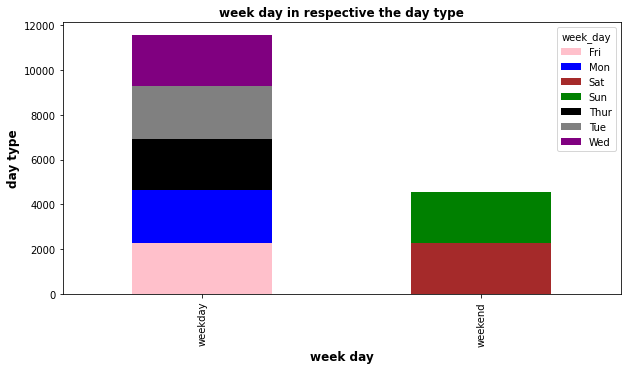

In [105]:
#Stacked bar chart of weekday with day type
pd.crosstab(car['day_type'],car['week_day']).plot(kind="bar",stacked=True,figsize=(10,5) , color=['pink','blue','brown','green','black','grey','purple'])
plt.title('week day in respective the day type', fontweight='bold', fontsize=12)
plt.xlabel('week day', fontweight='bold', fontsize=12)
plt.ylabel('day type', fontweight='bold', fontsize=12)

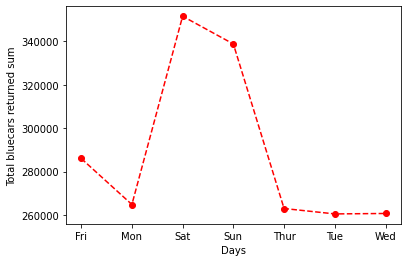

In [106]:
grouped = car.groupby('week_day')['BlueCars_returned_sum'].sum().reset_index(name= 'total_bluecars_returned_sum')
grouped
x = grouped['week_day']
y= grouped['total_bluecars_returned_sum']
plt.plot(x,y,color = 'red',marker = 'o',linestyle = '--')
plt.xlabel('Days')
plt.ylabel('Total bluecars returned sum')
plt.show()

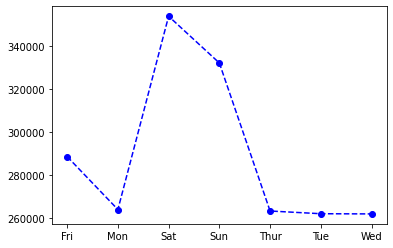

In [108]:
grouped1 = car.groupby('week_day')['BlueCars_taken_sum'].sum().reset_index(name= 'total_bluecars_taken_sum')
grouped1
x = grouped1['week_day']
y= grouped1['total_bluecars_taken_sum']
plt.plot(x,y,color = 'blue',marker = 'o',linestyle = '--')
plt.show()

In [109]:
grouped3= car.groupby('week_day')['n_daily_data_points'].sum().reset_index(name= 'total_n_daily_data_points')
grouped3
x = grouped3['week_day']
y= grouped3['total_n_daily_data_points']
plt.plot(x,y,color = 'green',marker = 'o',linestyle = '--')
plt.show()

KeyError: ignored

zscore

In [110]:
from scipy import stats
from scipy.stats import zscore

In [113]:
#Z Score for bluecars taken
taken = car['BlueCars_taken_sum']
from scipy.stats import zscore
stats.zscore(taken)

array([-0.08589624, -0.15061389,  0.06511162, ..., -0.50116785,
       -0.61981688, -0.66835512])

In [115]:
#Z Score for bluecars returned
returned = car['BlueCars_returned_sum']
from scipy.stats import zscore
stats.zscore(returned)

array([-0.12352149, -0.17204012,  0.07055302, ..., -0.49010667,
       -0.6033168 , -0.6680083 ])

In [119]:
car.head()

,Postal code,date,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum,week_day
0,75001,2018-01-01,0,weekday,110,103,3,2,10,9,22,20,Mon
1,75001,2018-01-02,1,weekday,98,94,1,1,8,8,23,22,Tue
2,75001,2018-01-03,2,weekday,138,139,0,0,2,2,27,27,Wed
3,75001,2018-01-04,3,weekday,104,104,2,2,9,8,25,21,Thur
4,75001,2018-01-05,4,weekday,114,117,3,3,6,6,18,20,Fri


In [120]:
#Z Score for postal code
returned = car['Postal code']
from scipy.stats import zscore
stats.zscore(returned)

array([-1.8033354 , -1.8033354 , -1.8033354 , ...,  0.92697914,
        0.92697914,  0.92697914])

In [121]:
from scipy.stats import ttest_ind
ttest_ind(car['BlueCars_returned_sum'],car['BlueCars_taken_sum'])

Ttest_indResult(statistic=-0.006884147830984164, pvalue=0.994507330804926)

**Multivariate analysis**

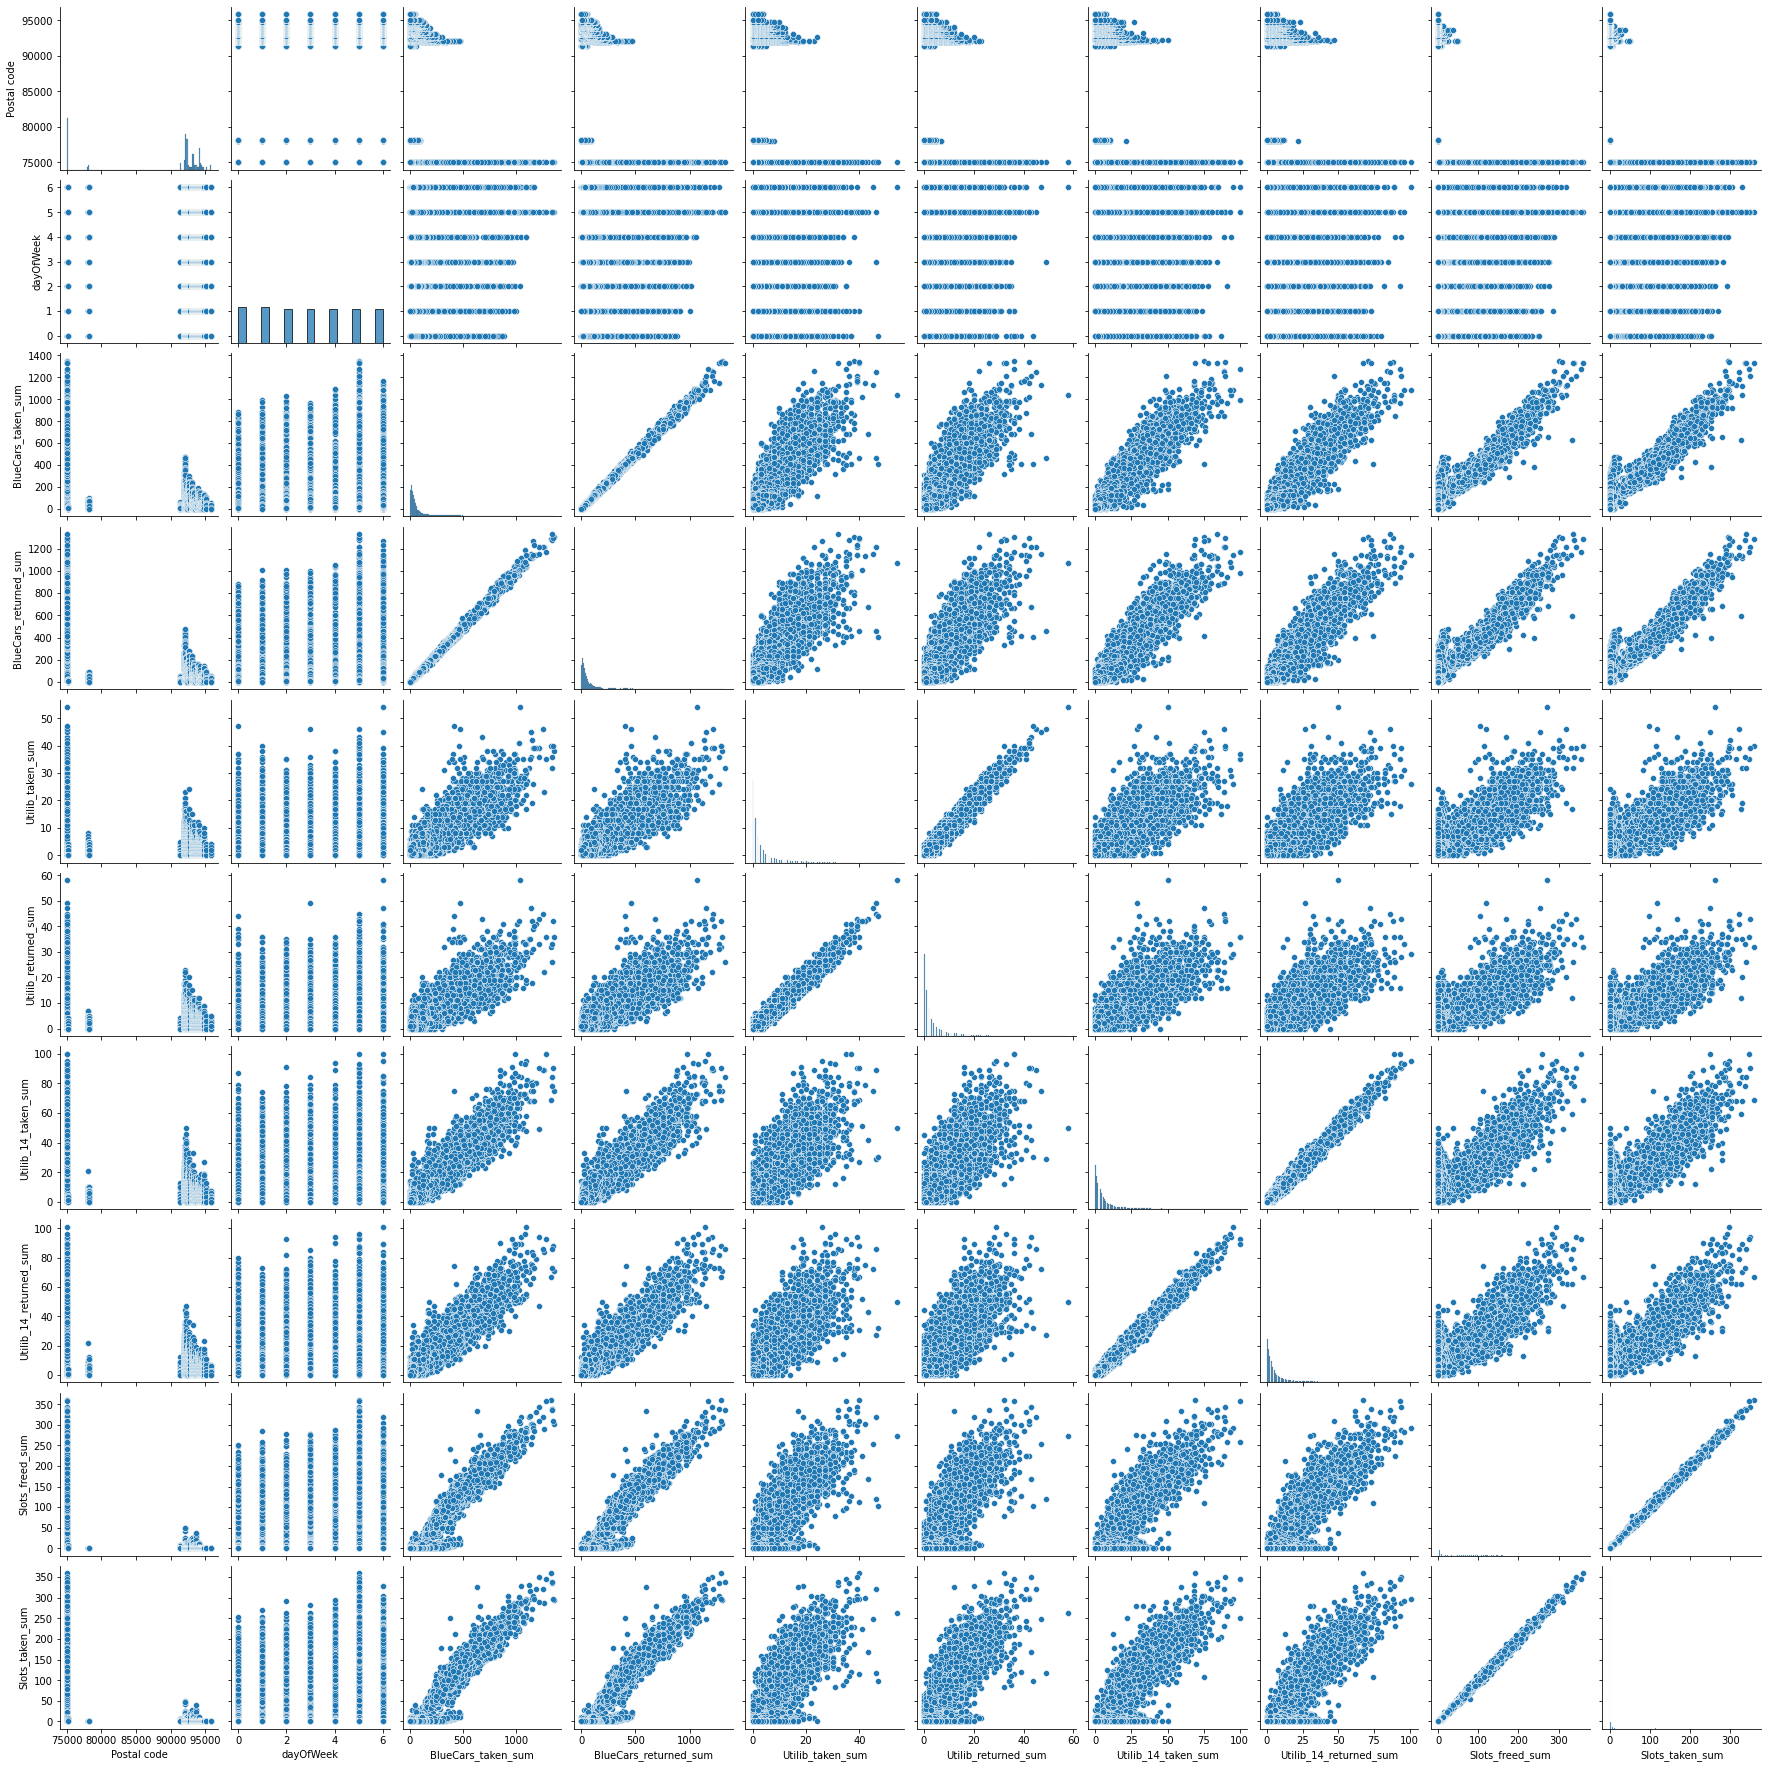

In [122]:
#Plotting a pair plot
sns.pairplot(car)
plt.show()

**Implementing the Solution**

**Hypothesis testing**

In [123]:
# ##  Null hypothesis: 
     #there is no difference in the average number of blue cars taken on saturday and that of the blue cars taken on sunday? 
## Alternative hypothesis:
        #there is a difference in the average number of blue cars taken on saturday to that of the blue cars taken on sunday

In [124]:
car.columns

Index(['Postal code', 'date', 'dayOfWeek', 'day_type', 'BlueCars_taken_sum',
       'BlueCars_returned_sum', 'Utilib_taken_sum', 'Utilib_returned_sum',
       'Utilib_14_taken_sum', 'Utilib_14_returned_sum', 'Slots_freed_sum',
       'Slots_taken_sum', 'week_day'],
      dtype='object')

In [125]:
#Locating the rows where the day type is weekend since our hypothesis only needed the weekend
df1 = car.loc[car['day_type'] == 'weekend']
df1

,Postal code,date,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum,week_day
5,75001,2018-01-06,5,weekend,187,185,6,6,7,8,38,35,Sat
6,75001,2018-01-07,6,weekend,180,180,2,2,10,9,34,34,Sun
12,75001,2018-01-13,5,weekend,224,223,2,2,15,15,38,38,Sat
13,75001,2018-01-14,6,weekend,193,193,2,2,12,12,22,20,Sun
19,75001,2018-01-20,5,weekend,217,217,2,2,25,25,41,39,Sat
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16068,95880,2018-06-03,6,weekend,36,33,1,1,2,2,0,0,Sun
16074,95880,2018-06-09,5,weekend,15,15,0,0,1,2,0,0,Sat
16075,95880,2018-06-10,6,weekend,34,32,0,0,1,0,0,0,Sun
16081,95880,2018-06-16,5,weekend,19,19,0,0,2,1,0,0,Sat


In [126]:
# import all libraries
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
#Call required libraries
import time                   # To time processes
import warnings               # To suppress warnings

import numpy as np            # Data manipulation
import pandas as pd           # Dataframe manipulatio 
import matplotlib.pyplot as plt                   # For graphics
%matplotlib inline
import seaborn as sns
sns.set()
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering
import os                     # For os related operations
import sys

In [128]:
# Stratified sample
df2 = df1.groupby('dayOfWeek', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))
df2

,Postal code,date,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum,week_day
5660,92170,2018-02-17,5,weekend,74,67,1,1,5,2,0,0,Sat
738,75005,2018-04-28,5,weekend,312,338,8,11,11,10,84,91,Sat
15138,94450,2018-06-09,5,weekend,27,25,3,1,8,7,0,0,Sat
9044,92410,2018-01-13,5,weekend,14,13,9,8,0,0,0,0,Sat
9153,92410,2018-05-05,5,weekend,8,7,0,0,3,3,0,0,Sat
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9370,92500,2018-01-28,6,weekend,123,137,6,8,12,10,0,0,Sun
3342,75116,2018-03-11,6,weekend,16,15,0,0,1,1,2,2,Sun
1526,75010,2018-05-06,6,weekend,384,381,7,6,20,23,97,93,Sun
10217,93110,2018-04-08,6,weekend,43,42,1,2,4,5,0,0,Sun


In [133]:
# population mean for blue cars taken
popmean = car['BlueCars_taken_sum'].mean()
popmean

125.92695057506994

In [131]:
# sample mean for blue cars taken
samplemean = df2['BlueCars_taken_sum'].mean()
samplemean

150.21806167400882

In [129]:
# sample standard deviation for bluecars taken
std = df2['BlueCars_taken_sum'].std()
std

224.75130927234696

In [134]:
# calculating the z-score for blue cars taken
zscore = (samplemean-popmean) / std
zscore

0.10807995369452392

In [135]:
#calculating the p value
from scipy.stats import norm
pro = stats.norm.cdf(zscore)
pro

0.5430338651856039

In [136]:
#interpretation of the p value
if pro < 0.05:    # alpha value is 0.05 or 5%
   print(" we  reject the null  hypothesis")
else:
  print("we fail to reject null hypothesis")

we fail to reject null hypothesis


In [138]:
# point estimation
# population.mean() - sample.mean()
# we will use the mean for the blue cars that were taken

car['BlueCars_taken_sum'].mean() - df2['BlueCars_taken_sum'].mean()

-24.291111098938885

Normality test

In [139]:
## NORMALITY TESTS
from scipy.stats import shapiro

def shapiro_test(df2, col_list):
    for x in col_list:
        print(x)
        data = df2[x]
        stat, p = shapiro(data)
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        # interpret
        alpha = 0.05
        if p > alpha:
            print('Sample looks Gaussian')
        else:
            print('Sample does not look Gaussian')
        print('\n')